In [49]:
import numpy as np

from sklearn import datasets, linear_model, svm
import matplotlib.pyplot as plt
import style_figs

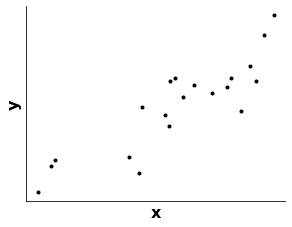

In [88]:

# data generation
np.random.seed(0)
n_sample = 20
x = np.random.rand(n_sample)
noise = np.random.randn(n_sample) * .3
y = 2*x + noise

# fig: linear_data
plt.figure(figsize = (4,3))
ax = plt.axes([.1, .1, .9, .9])
plt.scatter(x,y,  color='k', s=9)

plt.axis('tight')
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.savefig('linear_data.svg', facecolor='none', edgecolor='none')

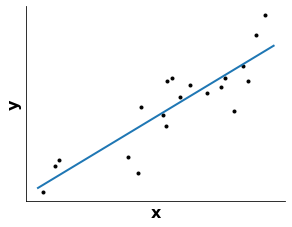

In [94]:
# fit linear regression

lr = linear_model.LinearRegression()
lr.fit(x.reshape(-1,1),y)
grid = np.linspace(0,1, 300)
y_hat = lr.predict(grid.reshape(-1, 1))

# fig: linear_fit

plt.figure(figsize = (4,3))
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()

plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.scatter(x,y,  color='k', s=9)
plt.plot(grid, y_hat, linewidth=2)

plt.savefig('../figures/linear_fit.svg', facecolor='none', edgecolor='none')

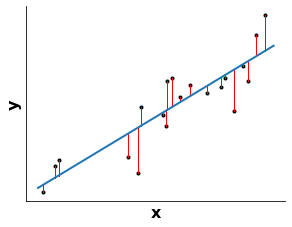

In [95]:
# with error in red

plt.figure(figsize = (4,3))
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.scatter(x,y,  color='k', s=9)
for xi, yi in zip(x,y):
    plt.plot([xi, xi], [xi * lr.coef_ + lr.intercept_, yi], c='r', linewidth = 1)
plt.plot(grid, y_hat, linewidth=2)
plt.savefig('../figures/linear_fit_red.svg')

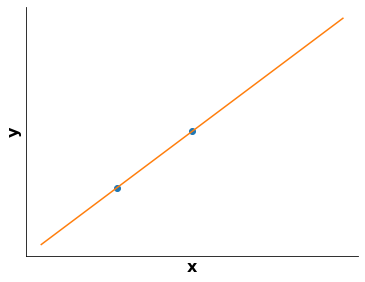

In [97]:
# Ridge variance
# from http://scipy-lectures.org/packages/scikit-learn/index.html#bias-variance-trade-off-illustration-on-a-simple-regression-problem
X = np.c_[ .5, 1].T
y = [.5, 1]
X_test = np.c_[ 0, 2].T

regr = linear_model.LinearRegression()
regr.fit(X, y)

plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.plot(X, y, 'o')
plt.plot(X_test, regr.predict(X_test), linewidth = 1.5)
plt.savefig('../figures/lin_reg_2_points.svg', facecolor='none', edgecolor='none')

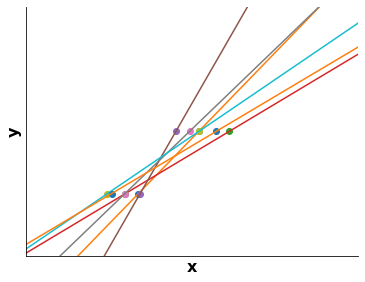

In [98]:
np.random.seed(0)
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
plt.xlim((0,2))
plt.ylim((0,2))
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=.1, size=X.shape)
    plt.plot(noisy_X, y, 'o')
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test), linewidth = 1.5)
plt.savefig('../figures/lin_reg_2_points_no_penalty.svg', facecolor='none', edgecolor='none')

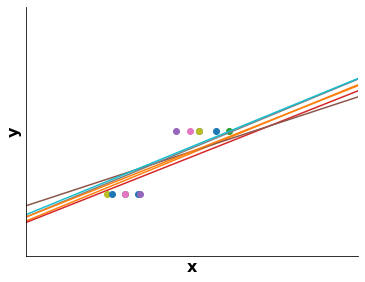

In [99]:
regr = linear_model.Ridge(alpha=.1)
plt.axes([.1, .1, .9, .9])
style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
np.random.seed(0)
plt.xlim((0,2))
plt.ylim((0,2))
for _ in range(6):
    noisy_X = X + np.random.normal(loc=0, scale=.1, size=X.shape)
    plt.plot(noisy_X, y, 'o')
    regr.fit(noisy_X, y)
    plt.plot(X_test, regr.predict(X_test), linewidth = 1.5)
    
plt.savefig('../figures/lin_reg_2_points_ridge.svg', facecolor='none', edgecolor='none')

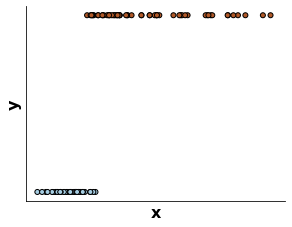

In [110]:
# Categorical


xmin, xmax = -5, 5
n_samples = 100
np.random.seed(0)
X = np.random.normal(size=n_samples)
y = (X > 0).astype(np.float)
X[X > 0] *= 4
X += .3 * np.random.normal(size=n_samples)

X_train = X[:, np.newaxis]
y_train = y

# Create linear regression object
regr = linear_model.LogisticRegression(C=1e5)

# Train the model using the training sets
regr.fit(X_train, y_train)

# plot the line, the points, and the nearest vectors to the plane
pl.figure(1, figsize=(4, 3))
pl.clf()
ax = pl.axes([.1, .1, .9, .9])

style_figs.light_axis()
plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
pl.scatter(X_train, y_train, s=25, zorder=20, c=y, edgecolor='k', cmap=pl.cm.Paired)

pl.xlim(-3, 10)
pl.savefig('categorical.svg', facecolor='none', edgecolor='none')


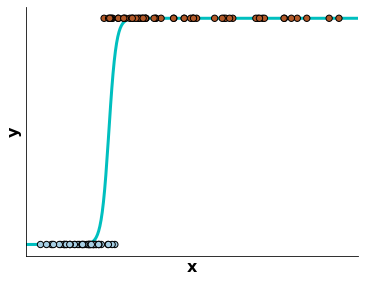

In [111]:

def model(x):
    return 1 / (1 + np.exp(-x))

X_test = np.linspace(-4, 10, 300)
loss = model(X_test * regr.coef_ + regr.intercept_).ravel()

plt.axes([.1, .1, .9, .9])
pl.plot(X_test, loss, color='c', linewidth=3)

pl.xlim(-3, 10)
# pl.savefig('logistic.pdf', facecolor='k', edgecolor='k')

pl.scatter(X.ravel(), y, c=y, zorder=25, s=40, edgecolor='k', cmap=pl.cm.Paired)

pl.xlim(-3, 10)

style_figs.light_axis()

plt.ylabel('y', size=16, weight=600)
plt.xlabel('x', size=16, weight=600)
pl.savefig('logistic_color.svg', facecolor='none', edgecolor='none')

# # A 2D version
# pl.figure(2, figsize=(3, 3), facecolor='k')
